In [25]:
%store -r merged_df
%store -r merged_df_clean
df = merged_df_clean.copy()
df.isnull().sum()

state_code                                 0
period                                     0
value                                      0
Crude Oil Production                       0
Dry Natural Gas Production                 0
Coal Production                            0
Total Energy Production (qBtu)             0
Liquid Fuels Consumption                   0
Natural Gas Consumption                    0
Coal Consumption                           0
Electricity Consumption                    0
Renewables Consumption                     0
Total Energy Consumption (qBtu)            0
Crude Oil ($/barrel)                       0
Natural Gas ($/mBtu)                       0
Coal ($/mBtu)                              0
Real Gross Domestic Product (Trillions)    0
RGDP Percent change YOY (%)                0
GDP Implicit Price Deflator                0
GDP IPD Percent change YOY (%)             0
Real Disposable Personal Income            0
RDPI Percent change YOY (%)                0
Manufactur

In [26]:
import pandas as pd

# Extract year and month into new columns to put into nerual network
time_df = df
time_df['year'] = df['period'].dt.year
time_df['month'] = df['period'].dt.month

time_df.columns

Index(['state_code', 'period', 'value', 'Crude Oil Production',
       'Dry Natural Gas Production', 'Coal Production',
       'Total Energy Production (qBtu)', 'Liquid Fuels Consumption',
       'Natural Gas Consumption', 'Coal Consumption',
       'Electricity Consumption', 'Renewables Consumption',
       'Total Energy Consumption (qBtu)', 'Crude Oil ($/barrel)',
       'Natural Gas ($/mBtu) ', 'Coal ($/mBtu)',
       'Real Gross Domestic Product (Trillions)',
       'RGDP Percent change YOY (%)', 'GDP Implicit Price Deflator',
       'GDP IPD Percent change YOY (%)', 'Real Disposable Personal Income',
       'RDPI Percent change YOY (%)', 'Manufacturing Production Index',
       'MPI Percent change YOY (%)', 'state_name_California',
       'state_name_Colorado', 'state_name_Florida', 'state_name_New York',
       'state_name_Texas', 'year', 'month'],
      dtype='object')

In [27]:
#getting X and Y data
y = time_df.value

features = ['Crude Oil Production',
            'Liquid Fuels Consumption',
            'Electricity Consumption',
            'Crude Oil ($/barrel)',
            'Real Gross Domestic Product (Trillions)',
            'RGDP Percent change YOY (%)',
            'Real Disposable Personal Income',
            'RDPI Percent change YOY (%)',
            'Manufacturing Production Index',
            'MPI Percent change YOY (%)',
            'GDP Implicit Price Deflator',
            'GDP IPD Percent change YOY (%)',
            'state_name_California',
            'state_name_Colorado', 
            'state_name_Florida', 
            'state_name_New York',
            'state_name_Texas',
            'year',
            'month']
            
X = time_df[features]

X.head()

,Crude Oil Production,Liquid Fuels Consumption,Electricity Consumption,Crude Oil ($/barrel),Real Gross Domestic Product (Trillions),RGDP Percent change YOY (%),Real Disposable Personal Income,RDPI Percent change YOY (%),Manufacturing Production Index,MPI Percent change YOY (%),GDP Implicit Price Deflator,GDP IPD Percent change YOY (%),state_name_California,state_name_Colorado,state_name_Florida,state_name_New York,state_name_Texas,year,month
0,5.4,18.65,11.06,78.33,16.583,1.7,12286,-0.6,89.6,2.4,89.0,0.5,True,False,False,False,False,2010,1
6957,5.4,18.65,11.06,78.33,16.583,1.7,12286,-0.6,89.6,2.4,89.0,0.5,False,False,False,False,True,2010,1
6958,5.4,18.65,11.06,78.33,16.583,1.7,12286,-0.6,89.6,2.4,89.0,0.5,False,False,False,False,True,2010,1
6959,5.4,18.65,11.06,78.33,16.583,1.7,12286,-0.6,89.6,2.4,89.0,0.5,False,False,False,False,True,2010,1
6960,5.4,18.65,11.06,78.33,16.583,1.7,12286,-0.6,89.6,2.4,89.0,0.5,False,False,False,False,True,2010,1


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6861, 19)
(2288, 19)
(6861,)
(2288,)


In [29]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

#model details
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[19]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

#lower learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

#compile model
model.compile(optimizer=optimizer, loss='mae')

#early stopping
early_stopping = EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

#training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 3.3039 - val_loss: 2.3116
Epoch 2/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.2163 - val_loss: 3.1029
Epoch 3/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.1305 - val_loss: 3.3745
Epoch 4/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0408 - val_loss: 3.2575
Epoch 5/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9534 - val_loss: 3.1146
Epoch 6/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8582 - val_loss: 2.8768
Epoch 7/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7688 - val_loss: 2.8454
Epoch 8/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6399 - val_loss: 2.5898
Epoch 9/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.5199 - val_loss: 2.3217
Epoch 10/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.4208 - val_loss: 2.0916
Epoch 11/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.2905 - val_loss: 2.0147
Epoch 12/100
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.1875 - val_lo

<Axes: >

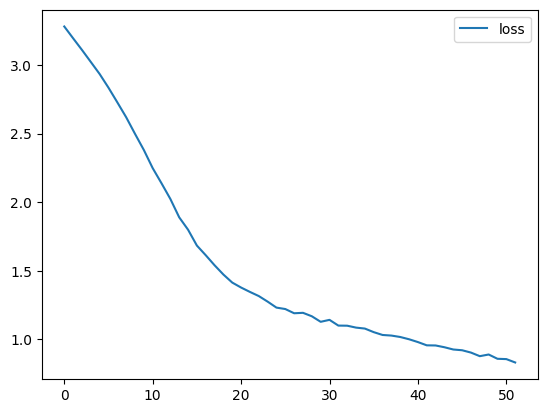

In [30]:
history_df = pd.DataFrame(history.history)
#starting plot at epoch 0
history_df.loc[0:, ['loss']].plot()

In [31]:
history_df.loc[0:, ['loss']]

,loss
0,3.279560
1,3.193616
2,3.108871
3,3.021312
4,2.933416
5,2.833836
6,2.727132
7,2.618686
8,2.497747
9,2.380069


In [32]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(mse)
print(mae)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.3671566873357808
0.45608289219199366


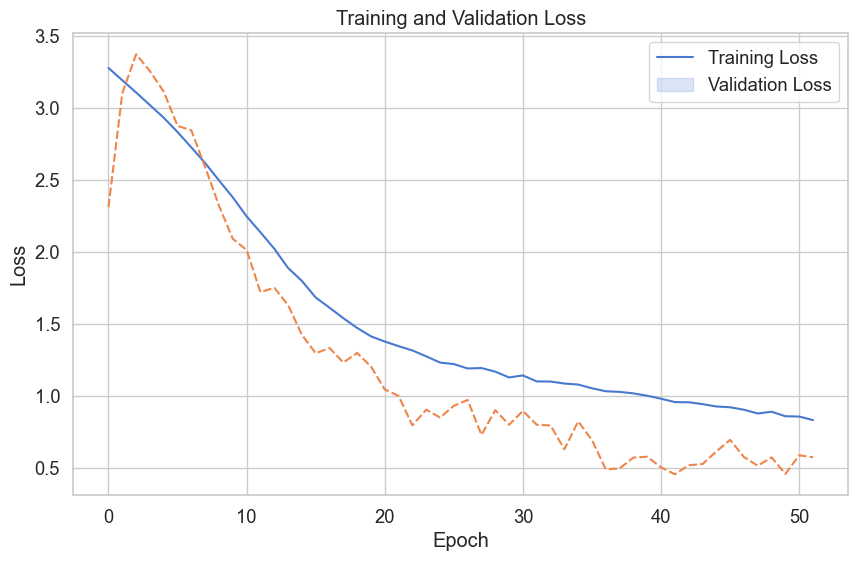

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

history_df = pd.DataFrame(history.history)

plt.figure(figsize=(10,6))
sns.lineplot(data=history_df[['loss', 'val_loss']])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(labels=['Training Loss', 'Validation Loss'])
plt.show()